# Multi_Model_Database_Project

## Model_Training_Part

## Import the required Libraries.

In [1]:

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV 
from sklearn.metrics import roc_curve, roc_auc_score, make_scorer, confusion_matrix, accuracy_score, r2_score,classification_report
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn import metrics

## Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Import and read the hotel and tourist place database. Store it in a variable called `hotel_df and place_df`.

In [2]:
hotel_df=pd.read_json('Hotels.json')
place_df=pd.read_json('ToristPlace .json')

In [3]:
hotel_df.head(3)

,address,city,country,crawl_date,hotel_brand,hotel_description,hotel_facilities,hotel_star_rating,image_count,latitude,...,room_type,similar_hotel,site_review_count,site_review_rating,site_stay_review_rating,sitename,special_tag,state,uniq_id,zone
0,"KHIRSU, 246147 Pauri, India – Great location -",pauri,India,2016-09-01,None,Khirsu By GMVN offers accommodation in Pauri. ...,Bathroom:Toilet paper|Linen|Towels|Bathroom|To...,None,3.0,30.123749,...,Economy Double Room,Hotel Mandakini,None,NaN,None,http://www.booking.com/,Share,Uttarakhand,a5ea72415f8007fcbe65759830fdd3d9,None
1,"Kaathadimattam, Balacola Post, NEAR Siva Tea F...",ooty,India,2016-09-01,None,"Situated in Ooty in the Tamil Nadu Region, 8 k...",Bathroom:Toilet paper|Linen|Towels|Bidet|Towel...,3 stars,NaN,11.329595,...,British Empire Chalet,Treebo Yantra Leisures|Western Valley Resorts|...,5,7.6,Location:8.5|Staff:8|Cleanliness:7.5|Comfort:7...,http://www.booking.com/,Share,Tamil Nadu,7e0b055417271bbd9dae902f3e231ed4,None
2,"PIPALKOTI, 246472 Pīpalkoti, India – Show map",pīpalkoti,India,2016-09-01,None,TRH Pipalkoti offers accommodation in Pīpalkot...,Bathroom:Toilet paper|Linen|Towels|Bathroom•Vi...,None,4.0,30.429540,...,Economy Double Room,TRH Joshimath (New),None,NaN,None,http://www.booking.com/,Share,Uttarakhand,72c0af09827bbb620365aa5df523ba1d,None


In [4]:

place_df.head()

,City,Place,Ratings,Distance,Place_desc,_key
0,Manali,1. Capture the Sceneries of Old Manali,3.9,2 km from city center,On the other side of the Manalsu river is a p...,Manali
1,Manali,2. Engage in the Adventures of Solang Valley,4.6,8 km from city center,Solang Valley is one of the most popular tour...,Manali
2,Manali,3. Jogini Waterfall,4.6,4 km from city center,Jogini Waterfall is located about 3 kilometre...,Manali
3,Manali,4. Hadimba Temple,4.4,1 km from city center,"Hadimba temple, away from the hustle and bust...",Manali
4,Manali,5. Rohtang Pass,4.4,16 km from city center,Rohtang pass is the stretch which connects Ma...,Manali


-  ### Subtask 1.2: Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [5]:
print(hotel_df.columns)
print(place_df.columns)

Index(['address', 'city', 'country', 'crawl_date', 'hotel_brand',
       'hotel_description', 'hotel_facilities', 'hotel_star_rating',
       'image_count', 'latitude', 'locality', 'longitude', 'pageurl',
       'property_id', 'property_name', 'property_type', 'province', 'qts',
       'room_count', 'room_type', 'similar_hotel', 'site_review_count',
       'site_review_rating', 'site_stay_review_rating', 'sitename',
       'special_tag', 'state', 'uniq_id', 'zone'],
      dtype='object')
Index(['City', 'Place', 'Ratings', 'Distance', 'Place_desc', '_key'], dtype='object')


In [6]:
print(hotel_df.shape);print(place_df.shape)

(6000, 29)
(2989, 6)


In [7]:
# code for inspection
hotel_df.describe()

,image_count,latitude,longitude,property_id,room_count,site_review_rating
count,3537.000000,6000.000000,6000.000000,5.410000e+03,5410.000000,4792.000000
mean,24.317218,21.349458,77.184569,1.282464e+06,25.373383,7.286269
std,11.177179,7.348339,3.990125,5.479691e+05,31.666920,1.203548
min,1.000000,8.082004,68.963419,4.825710e+05,1.000000,3.200000
25%,17.000000,15.007242,74.314587,5.482080e+05,10.000000,6.600000
50%,24.000000,22.472682,76.764852,1.623448e+06,20.000000,7.400000
75%,30.000000,28.395414,78.093757,1.691273e+06,30.000000,8.200000
max,57.000000,34.630544,93.020060,1.851397e+06,523.000000,9.900000


In [8]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   address                  5410 non-null   object 
 1   city                     5982 non-null   object 
 2   country                  6000 non-null   object 
 3   crawl_date               6000 non-null   object 
 4   hotel_brand              1312 non-null   object 
 5   hotel_description        5410 non-null   object 
 6   hotel_facilities         5410 non-null   object 
 7   hotel_star_rating        3075 non-null   object 
 8   image_count              3537 non-null   float64
 9   latitude                 6000 non-null   float64
 10  locality                 529 non-null    object 
 11  longitude                6000 non-null   float64
 12  pageurl                  6000 non-null   object 
 13  property_id              5410 non-null   float64
 14  property_name           



## Task 2: Cleaning the Data

-  ### Inspect Null values

Number of Null values in all the columns and rows. Also, the percentage of Null values in each column. Round off the percentages upto two decimal places.

In [9]:
# checking column-wise null percentages
cols = pd.DataFrame(hotel_df.isnull().mean().round(4) * 100, columns =['precentage_missing_value']).sort_values(by=['precentage_missing_value'])
print(cols)

                         precentage_missing_value
country                                      0.00
crawl_date                                   0.00
sitename                                     0.00
latitude                                     0.00
qts                                          0.00
longitude                                    0.00
pageurl                                      0.00
property_type                                0.00
uniq_id                                      0.00
room_type                                    0.08
city                                         0.30
state                                        0.82
address                                      9.83
special_tag                                  9.83
room_count                                   9.83
property_name                                9.83
hotel_facilities                             9.83
hotel_description                            9.83
property_id                                  9.83


# Summary of missing values associated with columns

In [10]:

print(str(round(100.0 * cols[cols['precentage_missing_value']==0].count()/len(cols),2))+"% " +"columns have no missing value")
print(str(round(100.0 * cols[(cols['precentage_missing_value']>0)&(cols['precentage_missing_value']<=10)].count()/len(cols),2))+"% " +"columns have missing value between 0-10 %")
print(str(round(100.0 * cols[(cols['precentage_missing_value']>10)&(cols['precentage_missing_value']<=50)].count()/len(cols),2))+"% " +"columns have missing value between 10-50 %")
print(str(round(100.0 * cols[cols['precentage_missing_value']>50].count()/len(cols),2))+"% " +"columns have more than 50% missing value")


precentage_missing_value    31.03
dtype: float64% columns have no missing value
precentage_missing_value    34.48
dtype: float64% columns have missing value between 0-10 %
precentage_missing_value    17.24
dtype: float64% columns have missing value between 10-50 %
precentage_missing_value    17.24
dtype: float64% columns have more than 50% missing value


In [11]:
# checking column-wise null percentages
cols = pd.DataFrame(place_df.isnull().mean().round(4) * 100, columns =['precentage_missing_value_place']).sort_values(by=['precentage_missing_value_place'])
print(cols)

            precentage_missing_value_place
City                                  0.00
Place                                 0.00
Place_desc                            0.00
_key                                  0.00
Distance                              0.54
Ratings                              44.16


-  ###  Drop unecessary rows using columns with high Null percentages

Now, on inspection you might notice that some columns have large percentage (greater than 50%) of Null values. Drop all the columns.

In [12]:
#Droping column having more than 50 % null values 
hotels_df_1 = hotel_df.drop(hotel_df.columns[ hotel_df.apply(lambda col: (col.isnull().sum()/len(hotel_df)*100) > 50)], axis=1)
print (hotels_df_1.columns)

Index(['address', 'city', 'country', 'crawl_date', 'hotel_description',
       'hotel_facilities', 'hotel_star_rating', 'image_count', 'latitude',
       'longitude', 'pageurl', 'property_id', 'property_name', 'property_type',
       'qts', 'room_count', 'room_type', 'similar_hotel', 'site_review_count',
       'site_review_rating', 'sitename', 'special_tag', 'state', 'uniq_id'],
      dtype='object')


In [13]:
to_drop = ['address','country', 'crawl_date','qts' ,'hotel_description', 'pageurl','property_id','uniq_id','room_type','property_name','property_type',
           'similar_hotel', 'sitename','site_review_count', 'special_tag']
clean_df = hotels_df_1.drop(to_drop, axis = 1)

In [14]:
# checking column-wise null percentages
cols = pd.DataFrame(clean_df.isnull().mean().round(4) * 100, columns =['precentage_missing_value']).sort_values(by=['precentage_missing_value'])
print(cols)

                    precentage_missing_value
latitude                                0.00
longitude                               0.00
city                                    0.30
state                                   0.82
hotel_facilities                        9.83
room_count                              9.83
site_review_rating                     20.13
image_count                            41.05
hotel_star_rating                      48.75


In [15]:
clean_df['hotel_star_rating']=clean_df['hotel_star_rating'].map({'1-star hotel': 1,'2-star hotel': 2,'3-star hotel': 3,'4-star hotel': 4,'5-star hotel': 5,
'1 stars': 1,'2 stars': 2,'3 stars': 3,'4 stars': 4,'5 stars': 5})

In [16]:
clean_df['hotel_star_rating'].describe()

count    3075.000000
mean        2.957073
std         1.030809
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: hotel_star_rating, dtype: float64

In [17]:
clean_df['hotel_star_rating'].value_counts(normalize=True)*100

3.0    45.788618
2.0    22.926829
4.0    13.886179
5.0     9.886179
1.0     7.512195
Name: hotel_star_rating, dtype: float64

In [18]:
clean_df['hotel_star_rating'].fillna(clean_df['hotel_star_rating'].median(),inplace=True)

In [19]:
clean_df.head()

,city,hotel_facilities,hotel_star_rating,image_count,latitude,longitude,room_count,site_review_rating,state
0,pauri,Bathroom:Toilet paper|Linen|Towels|Bathroom|To...,3.0,3.0,30.123749,78.793774,18.0,NaN,Uttarakhand
1,ooty,Bathroom:Toilet paper|Linen|Towels|Bidet|Towel...,3.0,NaN,11.329595,76.686732,10.0,7.6,Tamil Nadu
2,pīpalkoti,Bathroom:Toilet paper|Linen|Towels|Bathroom•Vi...,3.0,4.0,30.429540,79.428116,28.0,NaN,Uttarakhand
3,kumarakom,Bathroom:Toilet paper|Towels|Bath|Shower•Bedro...,3.0,2.0,9.616057,76.428269,1.0,NaN,Kerala
4,kumarakom,Bathroom:Toilet paper|Linen|Towels|Towels/Shee...,3.0,NaN,9.632854,76.423570,2.0,NaN,Kerala


In [20]:
clean_df['image_count'].value_counts()

25.0    278
46.0    252
24.0    171
20.0    167
26.0    157
21.0    132
28.0    126
19.0    120
17.0    117
23.0    116
18.0    112
27.0    107
13.0     92
30.0     83
16.0     82
22.0     80
10.0     80
11.0     74
12.0     74
15.0     73
29.0     71
14.0     67
32.0     66
9.0      62
31.0     60
45.0     59
7.0      57
8.0      52
33.0     46
37.0     45
35.0     41
36.0     40
5.0      40
42.0     35
6.0      32
34.0     31
4.0      30
39.0     29
47.0     28
38.0     28
40.0     26
41.0     23
44.0     16
3.0      16
2.0      14
43.0     13
1.0       7
48.0      4
57.0      2
52.0      2
51.0      1
53.0      1
Name: image_count, dtype: int64

In [21]:
clean_df['image_count'].describe()

count    3537.000000
mean       24.317218
std        11.177179
min         1.000000
25%        17.000000
50%        24.000000
75%        30.000000
max        57.000000
Name: image_count, dtype: float64

In [22]:
clean_df['image_count'].fillna(0, inplace = True)

In [23]:
clean_df['site_review_rating'].describe()

count    4792.000000
mean        7.286269
std         1.203548
min         3.200000
25%         6.600000
50%         7.400000
75%         8.200000
max         9.900000
Name: site_review_rating, dtype: float64

In [24]:
clean_df['site_review_rating'].value_counts()

7.7    208
7.6    185
7.2    179
7.4    176
7.3    169
      ... 
4.0      6
3.6      4
9.9      3
3.2      2
3.7      2
Name: site_review_rating, Length: 65, dtype: int64

In [25]:
clean_df['site_review_rating'].unique()

array([nan, 7.6, 8.4, 6.9, 6.2, 8.2, 7.7, 9. , 7.9, 9.2, 7. , 5.8, 5.3,
       9.7, 9.3, 8.8, 7.5, 7.2, 8.6, 5.5, 7.3, 8. , 9.5, 7.1, 6.8, 6.7,
       5.4, 6.1, 5.7, 4. , 8.1, 8.5, 9.1, 6.4, 7.4, 8.7, 9.6, 4.4, 8.9,
       6.6, 9.4, 6.3, 7.8, 4.8, 5.9, 6.5, 8.3, 4.6, 4.9, 4.7, 5.1, 3.8,
       6. , 4.5, 5.6, 5.2, 4.1, 5. , 3.4, 4.2, 3.6, 4.3, 9.8, 9.9, 3.2,
       3.7])

In [26]:
clean_df['site_review_rating'].value_counts(normalize=True)*100

7.7    4.340568
7.6    3.860601
7.2    3.735392
7.4    3.672788
7.3    3.526711
         ...   
4.0    0.125209
3.6    0.083472
9.9    0.062604
3.2    0.041736
3.7    0.041736
Name: site_review_rating, Length: 65, dtype: float64

<AxesSubplot:xlabel='site_review_rating'>

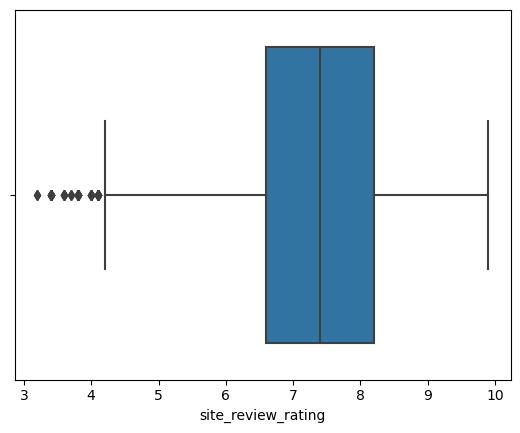

In [27]:
import seaborn as sns
sns.boxplot(clean_df['site_review_rating'])

In [28]:
clean_df['site_review_rating'].fillna(clean_df['site_review_rating'].mean(),inplace=True)

In [29]:
clean_df['room_count'].isnull().sum()

590

In [30]:
clean_df['room_count'].describe()

count    5410.000000
mean       25.373383
std        31.666920
min         1.000000
25%        10.000000
50%        20.000000
75%        30.000000
max       523.000000
Name: room_count, dtype: float64

In [31]:

clean_df['room_count'].value_counts(normalize=True)*100

5.0      4.306839
20.0     3.844732
8.0      3.807763
6.0      3.789279
11.0     3.604436
           ...   
200.0    0.036969
201.0    0.036969
109.0    0.036969
374.0    0.018484
87.0     0.018484
Name: room_count, Length: 124, dtype: float64

<AxesSubplot:xlabel='room_count'>

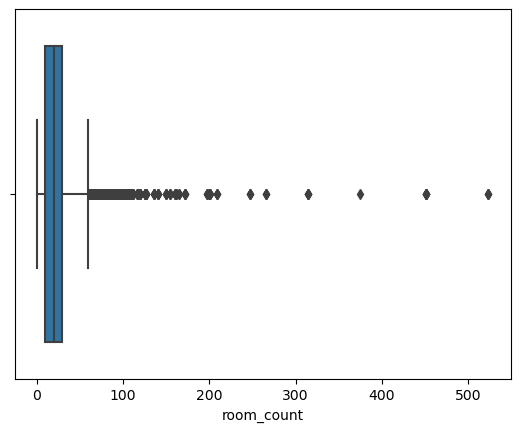

In [32]:
sns.boxplot(clean_df['room_count'])

In [33]:
clean_df['room_count'].fillna(clean_df['room_count'].median(),inplace=True)

In [34]:
# checking row-wise null percentages
row_null= pd.DataFrame(clean_df.isnull().sum(axis=0), columns=['num_missing_value']).sort_values(by=['num_missing_value'])
row_null

,num_missing_value
hotel_star_rating,0
image_count,0
latitude,0
longitude,0
room_count,0
site_review_rating,0
city,18
state,49
hotel_facilities,590


In [35]:
clean_df=clean_df.dropna(how='any',axis=0)

In [36]:
clean_df.drop_duplicates(inplace=True)

In [37]:
clean_df.shape

(3258, 9)

In [38]:
place_df.head(3)

,City,Place,Ratings,Distance,Place_desc,_key
0,Manali,1. Capture the Sceneries of Old Manali,3.9,2 km from city center,On the other side of the Manalsu river is a p...,Manali
1,Manali,2. Engage in the Adventures of Solang Valley,4.6,8 km from city center,Solang Valley is one of the most popular tour...,Manali
2,Manali,3. Jogini Waterfall,4.6,4 km from city center,Jogini Waterfall is located about 3 kilometre...,Manali


In [39]:
place_df=place_df.drop(['_key'],axis=1)

In [40]:
place_df['Ratings'].isnull().sum()

1320

In [41]:
place_df['Ratings'].value_counts(normalize=True)*100

3.2    18.993409
3.3     9.946075
3.5     9.047334
4.3     7.189934
3.0     6.830437
4.2     6.710605
3.6     6.530857
3.7     6.291192
3.1     5.272618
3.4     4.613541
4.4     4.433793
3.8     4.313960
4.0     2.875974
3.9     2.276812
4.5     1.977232
4.1     1.138406
4.6     1.078490
4.7     0.239664
4.8     0.059916
5.0     0.059916
4.9     0.059916
2.9     0.059916
Name: Ratings, dtype: float64

In [42]:
place_df['Ratings'].describe()

count    1669.000000
mean        3.606711
std         0.461091
min         2.900000
25%         3.200000
50%         3.500000
75%         4.000000
max         5.000000
Name: Ratings, dtype: float64

<AxesSubplot:xlabel='Ratings'>

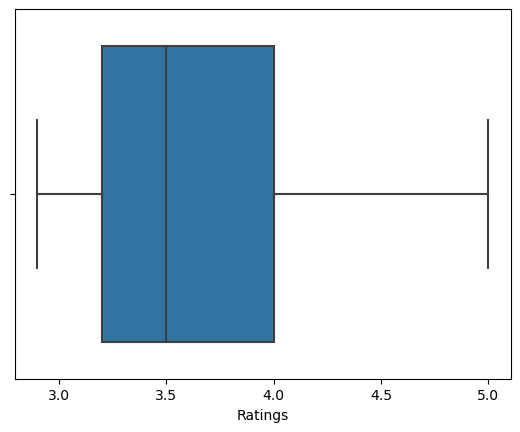

In [43]:
sns.boxplot(place_df['Ratings'])

In [44]:
place_df['Ratings'].fillna(place_df['Ratings'].median(),inplace=True)

In [45]:
place_df['Distance'].unique()

array([' 2 km  from city center ', ' 8 km  from city center ',
       ' 4 km  from city center ', ' 1 km  from city center ',
       ' 16 km  from city center ',
       ' 6 out of 50  places to visit in Manali ',
       ' 3 km  from city center ', ' 11 km  from city center ',
       ' 0 km  from city center ', ' 28 km  from city center ',
       ' 17 km  from city center ', ' 27 km  from city center ',
       ' 18 out of 50  places to visit in Manali ',
       ' 14 km  from city center ', ' 32 km  from city center ',
       ' 12 km  from city center ', ' 9 km  from city center ',
       ' 21 km  from city center ', ' 63 km  from city center ',
       ' 19 km  from city center ', ' 37 km  from city center ',
       ' 5 km  from city center ', ' 40 km  from city center ',
       ' 48 km  from city center ',
       ' 48 out of 50  places to visit in Manali ',
       ' 49 out of 50  places to visit in Manali ',
       ' 156 km  from city center ', ' 20 km  from city center ',
       ' 71 k

In [46]:
place_df['distance']=place_df['Distance'].str.split(" ",expand=True)[1]

In [47]:
place_df=place_df.drop(['Distance'],axis=1)

In [48]:
place_df.head()

,City,Place,Ratings,Place_desc,distance
0,Manali,1. Capture the Sceneries of Old Manali,3.9,On the other side of the Manalsu river is a p...,2
1,Manali,2. Engage in the Adventures of Solang Valley,4.6,Solang Valley is one of the most popular tour...,8
2,Manali,3. Jogini Waterfall,4.6,Jogini Waterfall is located about 3 kilometre...,4
3,Manali,4. Hadimba Temple,4.4,"Hadimba temple, away from the hustle and bust...",1
4,Manali,5. Rohtang Pass,4.4,Rohtang pass is the stretch which connects Ma...,16


In [49]:
place_df.drop_duplicates(inplace=True)

In [50]:
place_df.shape

(2989, 5)

In [51]:
# Analysis for city to be a primary key
# Previous Application analysis

print ("Total count:", clean_df['city'].count())
print ("Number of unique values:", clean_df['city'].nunique())

if (clean_df['city'].count() == clean_df['city'].nunique()):
    print ("city has all unique values")
else:
    print ("city doesn't have all unique values")

Total count: 3258
Number of unique values: 522
city doesn't have all unique values


In [52]:
# Analysis for city to be a primary key
# Previous Application analysis

print ("Total count:", place_df['City'].count())
print ("Number of unique values:", place_df['City'].nunique())

if (place_df['City'].count() == place_df['City'].nunique()):
    print ("city has all unique values")
else:
    print ("city doesn't have all unique values")

Total count: 2989
Number of unique values: 96
city doesn't have all unique values


In [53]:
clean_df=clean_df.drop(['city'],axis=1)

In [54]:
df_dummies = pd.concat([clean_df, pd.get_dummies(clean_df['state'])], axis=1)
df_dummies.drop('state', axis = 1, inplace = True) 
df_dummies.reset_index(drop = True, inplace = True)
df_dummies.head()

,hotel_facilities,hotel_star_rating,image_count,latitude,longitude,room_count,site_review_rating,Andaman and Nicobar,Andhra Pradesh,Assam,...,Orissa,Pondicherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Uttar Pradesh,Uttarakhand,West Bengal
0,Bathroom:Toilet paper|Linen|Towels|Bathroom|To...,3.0,3.0,30.123749,78.793774,18.0,7.286269,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Bathroom:Toilet paper|Linen|Towels|Bidet|Towel...,3.0,0.0,11.329595,76.686732,10.0,7.600000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Bathroom:Toilet paper|Linen|Towels|Bathroom•Vi...,3.0,4.0,30.429540,79.428116,28.0,7.286269,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Bathroom:Toilet paper|Towels|Bath|Shower•Bedro...,3.0,2.0,9.616057,76.428269,1.0,7.286269,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bathroom:Toilet paper|Linen|Towels|Towels/Shee...,3.0,0.0,9.632854,76.423570,2.0,7.286269,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Feature_Engineering

In [55]:
facilities = []
for row in df_dummies.hotel_facilities:
    fac_split = row.split(sep = '•')
    facilities.extend([a.split(':', 1)[0]for a in fac_split])
facilities = sorted(list(set(facilities)))
hotel_facilities_create = pd.DataFrame(columns = facilities)
for row in df_dummies.hotel_facilities:
    first = row.split(sep = '•')
    feature_columns = [row.split(':', 1)[0] for row in first]
    second = [row.split(':', 1)[-1] for row in first]
    third = [row.split(sep = '|') for row in second]
    lenghts = [len(row) for row in third]
    to_special_cases = dict(zip(feature_columns,third))
    to_df = dict(zip(feature_columns,lenghts))
    
    if to_special_cases['Pets'] == ['Pets are not allowed.']:
        to_df['Pets'] = 0

    if to_special_cases['Internet'] == ['No internet access available.']:
        to_df['Internet'] = 0

    try:
        if to_special_cases['Parking'] == ['No parking available.']:
            to_df['Parking'] = 0
    except:
        None
    
    hotel_facilities_create = hotel_facilities_create.append(to_df, ignore_index=True)
    
hotel_facilities_create.fillna(0, inplace = True)

final_df = pd.concat([df_dummies, hotel_facilities_create], axis = 1)
final_df.drop('hotel_facilities', axis = 1, inplace = True)
final_df.head()

,hotel_star_rating,image_count,latitude,longitude,room_count,site_review_rating,Andaman and Nicobar,Andhra Pradesh,Assam,Bihar,...,Pets,Pool and wellness,Reception services,Room Amenities,Services,Services & Extras,Shops,Ski,Transport,View
0,3.0,3.0,30.123749,78.793774,18.0,7.286269,0,0,0,0,...,0,0,0,1,5,0,0,0,0,2
1,3.0,0.0,11.329595,76.686732,10.0,7.600000,0,0,0,0,...,0,0,6,1,0,0,0,0,0,2
2,3.0,4.0,30.429540,79.428116,28.0,7.286269,0,0,0,0,...,0,0,0,0,5,0,0,0,0,2
3,3.0,2.0,9.616057,76.428269,1.0,7.286269,0,0,0,0,...,0,0,3,1,0,0,0,0,0,2
4,3.0,0.0,9.632854,76.423570,2.0,7.286269,0,0,0,0,...,1,0,0,1,4,0,0,0,0,1


In [56]:
print(final_df.shape)
#final_rating_df=final_df.drop(['site_review_rating'],axis=1)

(3258, 65)


In [57]:
final_df.iloc[:,1:]

,image_count,latitude,longitude,room_count,site_review_rating,Andaman and Nicobar,Andhra Pradesh,Assam,Bihar,Chandigarh,...,Pets,Pool and wellness,Reception services,Room Amenities,Services,Services & Extras,Shops,Ski,Transport,View
0,3.0,30.123749,78.793774,18.0,7.286269,0,0,0,0,0,...,0,0,0,1,5,0,0,0,0,2
1,0.0,11.329595,76.686732,10.0,7.600000,0,0,0,0,0,...,0,0,6,1,0,0,0,0,0,2
2,4.0,30.429540,79.428116,28.0,7.286269,0,0,0,0,0,...,0,0,0,0,5,0,0,0,0,2
3,2.0,9.616057,76.428269,1.0,7.286269,0,0,0,0,0,...,0,0,3,1,0,0,0,0,0,2
4,0.0,9.632854,76.423570,2.0,7.286269,0,0,0,0,0,...,1,0,0,1,4,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3253,40.0,26.455199,74.637099,37.0,5.200000,0,0,0,0,0,...,0,0,9,0,0,0,0,0,0,0
3254,6.0,28.645580,77.216779,9.0,5.800000,0,0,0,0,0,...,1,0,0,0,6,0,0,0,1,0
3255,20.0,9.171208,77.533986,15.0,5.200000,0,0,0,0,0,...,0,0,0,2,3,0,0,0,0,0
3256,5.0,26.455262,74.636580,21.0,7.200000,0,0,0,0,0,...,0,0,0,1,5,0,0,0,0,2


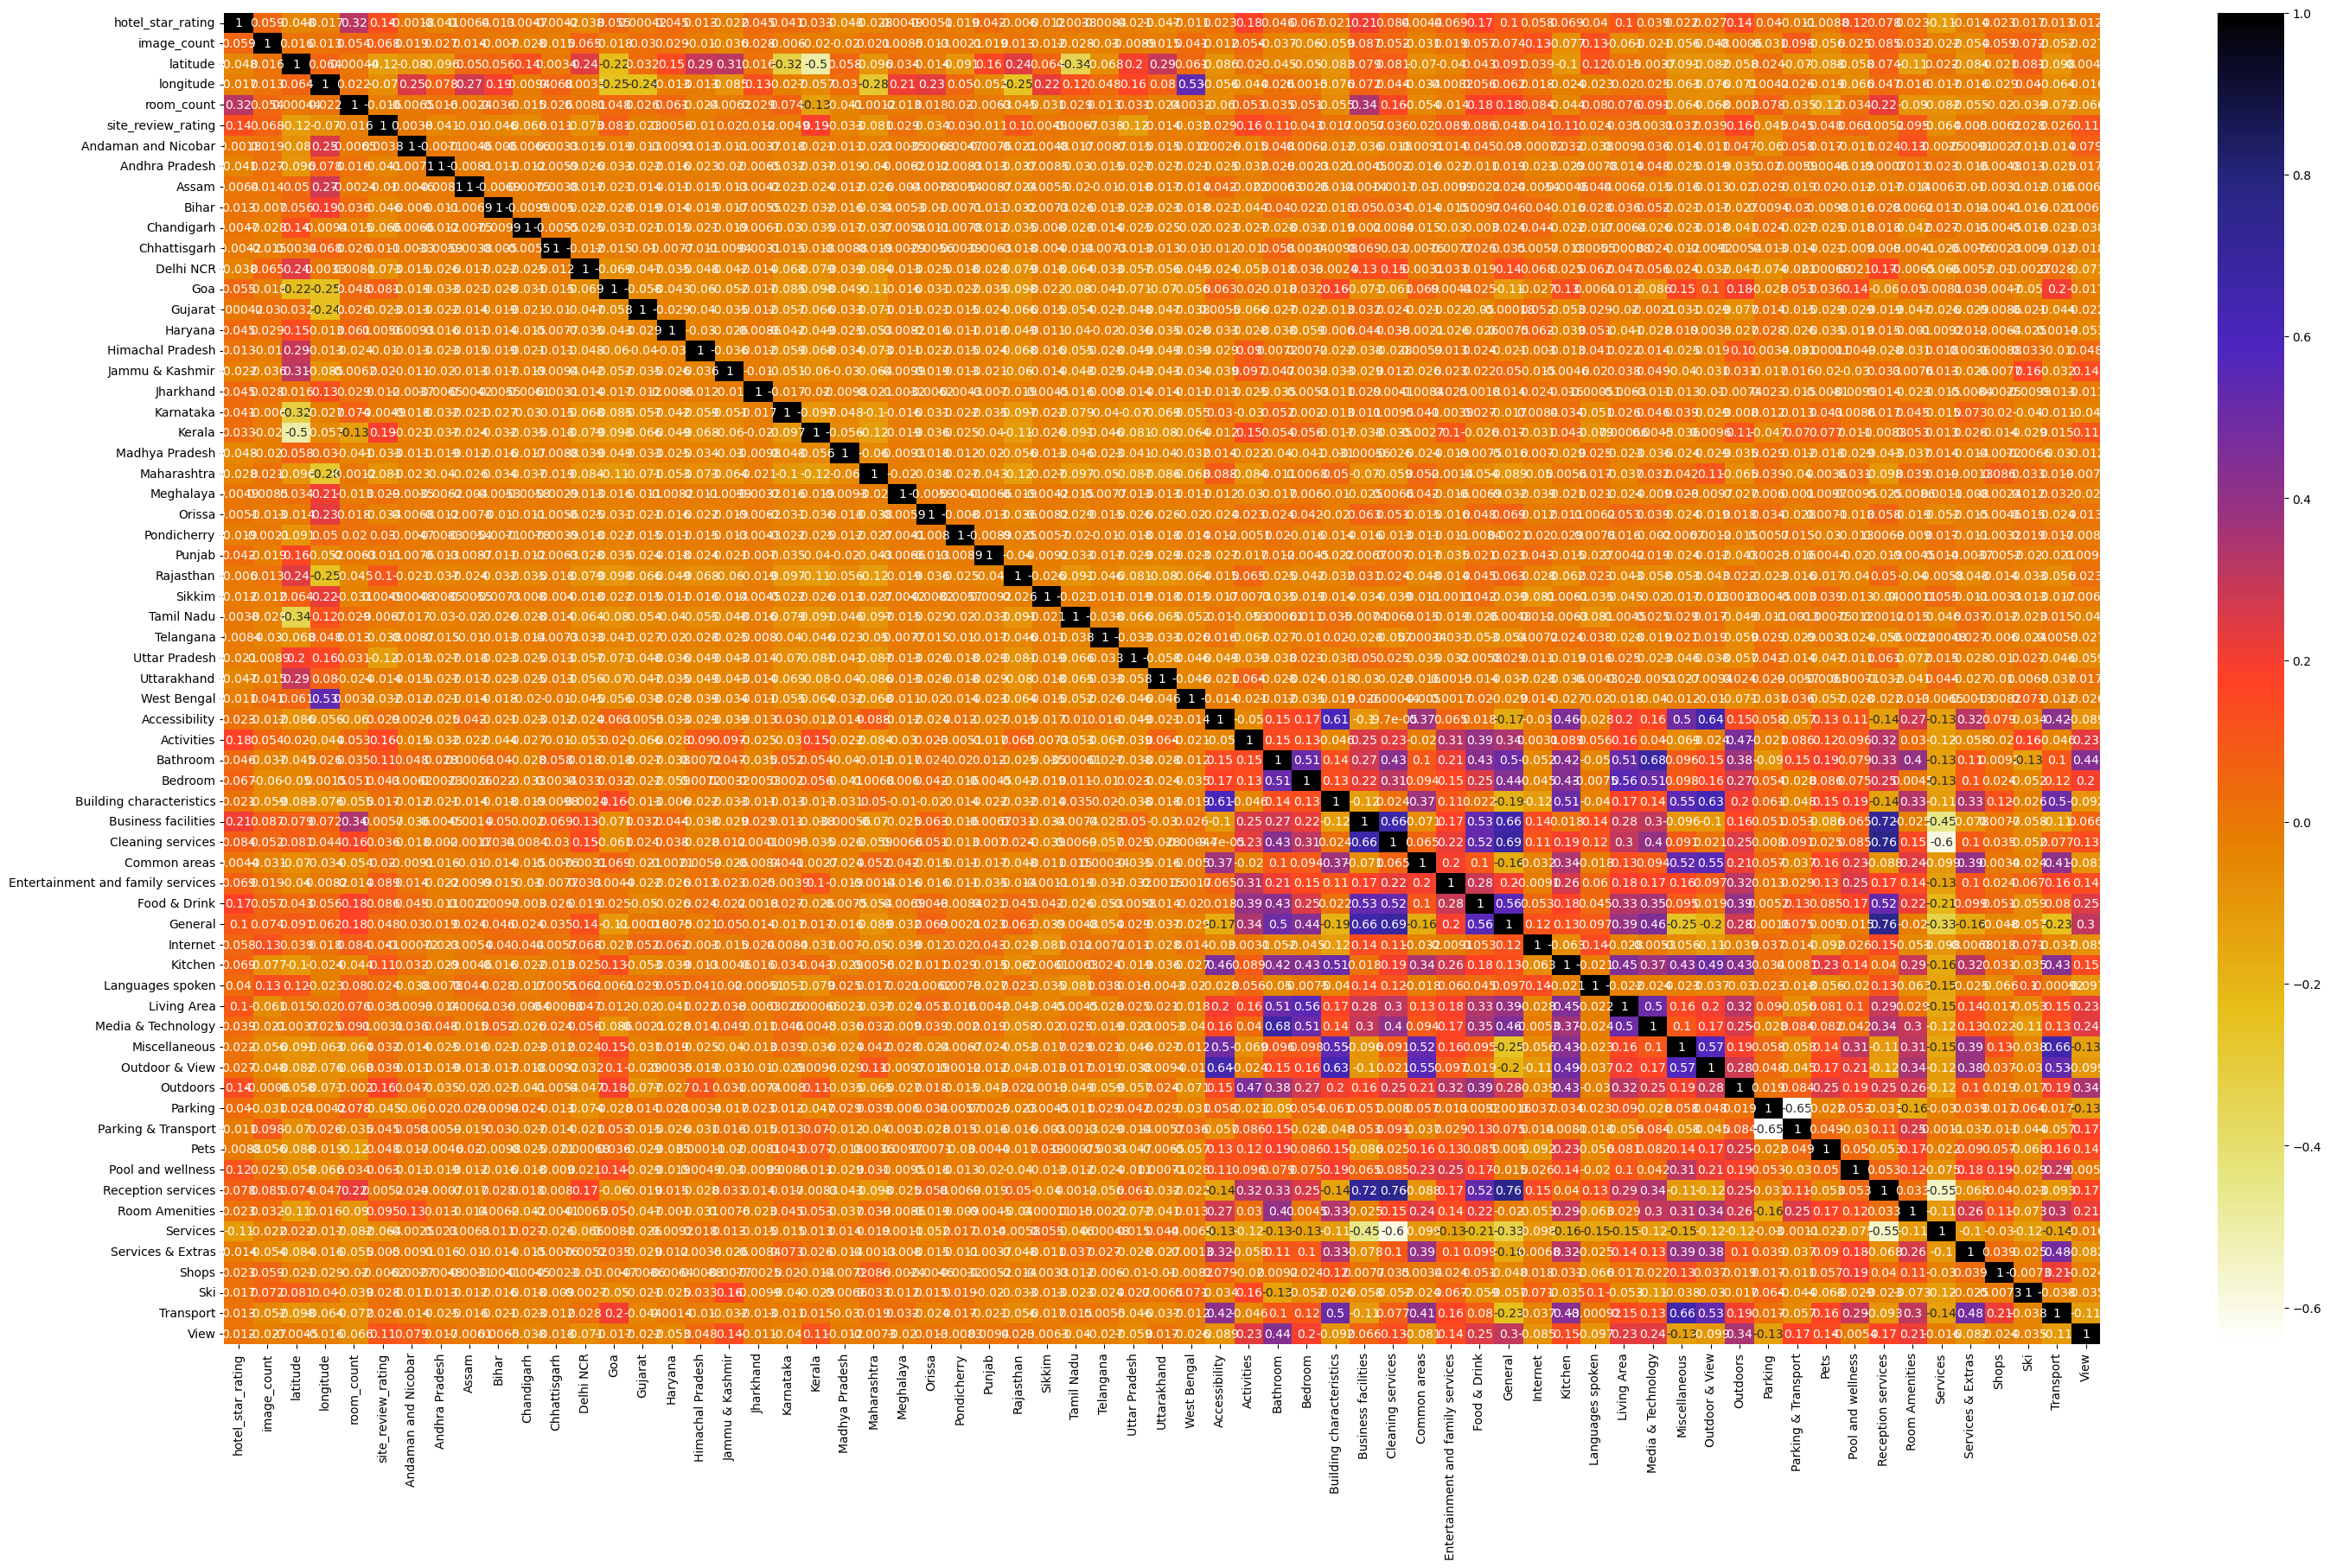

In [58]:
plt.figure(figsize=(35,20))
cor=final_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [59]:
def correlation(df,value):
    col_corr= set()
    corr_df=df.corr()
    for i in range(len(corr_df.columns)):
        for j in range(i):
            if abs(corr_df.iloc[i,j]) > value:
                colname = corr_df.columns[i]
                col_corr.add(colname)
    return col_corr

## Spliting Dataset

In [60]:
X_value = final_df.iloc[:,1:]
y_value = final_df['hotel_star_rating']

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X_value,y_value,test_size=0.25,random_state=22)

## Feature Selection

In [62]:
corr_feat= correlation(X_train,0.7)
len(set(corr_feat))
print(corr_feat)

{'Reception services'}


In [63]:
X_train=X_train.drop(['Reception services'],axis=1)
X_test=X_test.drop(['Reception services'],axis=1)

## Feature_Scaling

In [64]:
stc=StandardScaler()
X_smote=stc.fit_transform(X_train)
# # final_df=stc.transform(final_df)

In [65]:
#X_smote=preprocessing.MinMaxScaler().fit_transform(X_train)

## Model_Creation

In [66]:
def classifier_pred(est,X,Y,parameters):
  scorer = make_scorer(accuracy_score) 
  clf = GridSearchCV(estimator = est, param_grid  = parameters, cv = 10, return_train_score=True)
  a=clf.fit(X = X,y = Y)
  res=clf.cv_results_ 
  score=clf.best_score_
  return [res, score]

In [67]:
models = {
    "K-Neighbors Regressor Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier()
}
parameters = {'max_depth': [30, 50, 70, 100], 'min_samples_split': [2, 3, 4, 5]}
predicton=classifier_pred(DecisionTreeClassifier(),X_smote,y_train,parameters)
print(predicton)

[{'mean_fit_time': array([0.043734  , 0.03748806, 0.03770449, 0.03880866, 0.0403368 ,
       0.03838258, 0.04258957, 0.03933904, 0.03749118, 0.03592827,
       0.04142835, 0.0370738 , 0.0434418 , 0.03704913, 0.03748839,
       0.03593059]), 'std_fit_time': array([0.0146126 , 0.0076504 , 0.00949092, 0.01031849, 0.00919347,
       0.00711279, 0.00671792, 0.00669811, 0.00765183, 0.0071609 ,
       0.00649432, 0.00492937, 0.00603127, 0.00914982, 0.00764983,
       0.0071594 ]), 'mean_score_time': array([0.00196385, 0.        , 0.        , 0.00166209, 0.00186136,
       0.00156248, 0.00057065, 0.00130212, 0.00156224, 0.        ,
       0.00039706, 0.00049937, 0.00040116, 0.00166192, 0.00312445,
       0.00312533]), 'std_score_time': array([0.00460833, 0.        , 0.        , 0.00466309, 0.00460833,
       0.00468743, 0.00046894, 0.00358599, 0.00468671, 0.        ,
       0.00048633, 0.0006655 , 0.00049165, 0.00466244, 0.0062489 ,
       0.00625067]), 'param_max_depth': masked_array(data=[30

In [68]:
parameters = {'max_depth': [10, 30, 50, 70], 'n_estimators': [20, 50, 100]}
classifier_pred(RandomForestClassifier(),X_train,y_train,parameters)

[{'mean_fit_time': array([0.09757359, 0.22621813, 0.42474496, 0.10935252, 0.26399999,
         0.52643983, 0.11247687, 0.25931149, 0.52447546, 0.10622442,
         0.30618396, 0.53893332]),
  'std_fit_time': array([0.01072309, 0.0168337 , 0.0045992 , 0.00698618, 0.00468617,
         0.00999803, 0.00937175, 0.00765741, 0.0074106 , 0.00624847,
         0.00765775, 0.02542885]),
  'mean_score_time': array([0.00504773, 0.01252837, 0.01718364, 0.00624859, 0.01249735,
         0.02186909, 0.0078109 , 0.01405919, 0.02187011, 0.00781078,
         0.01249778, 0.02499664]),
  'std_score_time': array([0.0068074 , 0.00687864, 0.00468609, 0.00765293, 0.00624868,
         0.00765301, 0.0078109 , 0.0046864 , 0.00765178, 0.00781078,
         0.00624889, 0.00765469]),
  'param_max_depth': masked_array(data=[10, 10, 10, 30, 30, 30, 50, 50, 50, 70, 70, 70],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?

In [69]:
parameters = {'n_neighbors': [1,2,3,5],'p' :[1,2] }
classifier_pred(KNeighborsClassifier(),X_train,y_train,parameters)

[{'mean_fit_time': array([0.00351312, 0.00403447, 0.00529506, 0.00359428, 0.00781453,
         0.00625277, 0.0062499 , 0.00864284]),
  'std_fit_time': array([0.00616349, 0.00590327, 0.00577406, 0.00660395, 0.00781453,
         0.00765805, 0.01036347, 0.00927704]),
  'mean_score_time': array([0.0850662 , 0.02644157, 0.08187704, 0.0276392 , 0.07895479,
         0.02498298, 0.08748083, 0.03214552]),
  'std_score_time': array([0.00859977, 0.01017437, 0.0064221 , 0.00639322, 0.00255178,
         0.00765707, 0.00765443, 0.00731138]),
  'param_n_neighbors': masked_array(data=[1, 1, 2, 2, 3, 3, 5, 5],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_p': masked_array(data=[1, 2, 1, 2, 1, 2, 1, 2],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_neighbors': 1, 'p': 1},
   {'n_neighbors': 1, 'p': 2},
   {'n

In [70]:
# parameters = {'base_estimator': [DecisionTreeClassifier(max_depth=10)], 'learning_rate': [0.3, 0.5, 0.7, 1], 'n_estimators': [20, 50, 100]}
# classifier_pred(AdaBoostClassifier(),X_train,y_train,parameters)

[{'mean_fit_time': array([0.62275665, 1.54914815, 2.83457208, 0.58170569, 1.42369678,
         2.95517299, 0.58517063, 1.43671308, 2.91447515, 0.61516199,
         1.46724832, 2.96729827]),
  'std_fit_time': array([0.02034359, 0.08365868, 0.06271171, 0.00476117, 0.01425661,
         0.23106949, 0.00716643, 0.01807754, 0.11007205, 0.02829094,
         0.02432333, 0.10171507]),
  'mean_score_time': array([0.00531347, 0.02186623, 0.04062259, 0.01116605, 0.01902645,
         0.03297429, 0.00880888, 0.02344534, 0.04217868, 0.01090498,
         0.02093568, 0.04372816]),
  'std_score_time': array([0.00668888, 0.00915289, 0.00765051, 0.00734064, 0.00616404,
         0.00470455, 0.00737496, 0.00782133, 0.01000194, 0.00592476,
         0.00698893, 0.00938865]),
  'param_base_estimator': masked_array(data=[DecisionTreeClassifier(max_depth=10),
                     DecisionTreeClassifier(max_depth=10),
                     DecisionTreeClassifier(max_depth=10),
                     DecisionTreeClas

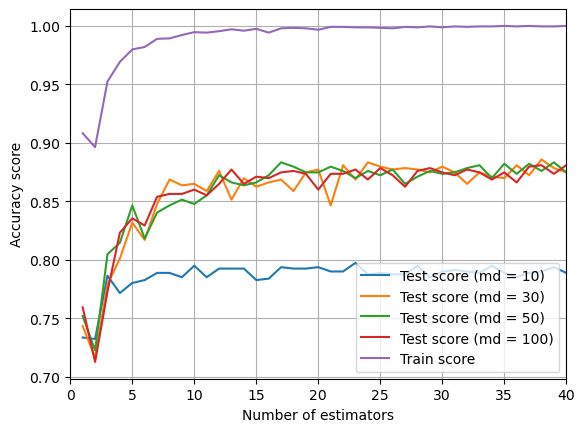

In [71]:

n_estimators = 40
max_depth = [10, 30, 50, 100]
for md in max_depth:
    acc_train = []
    acc_test = []
    for n in range(1,n_estimators+1):
        model = RandomForestClassifier(n_estimators = n, max_depth = md)
        model.fit(X = X_train, y = y_train)

        predict_train = model.predict(X_train)    
        predict_test = model.predict(X_test)

        acc_train.append(accuracy_score(y_train, predict_train))
        acc_test.append(accuracy_score(y_test, predict_test))

    plt.plot(list(range(1,n_estimators+1)),acc_test, label = 'Test score (md = '+str(md)+')')

plt.plot(list(range(1,n_estimators+1)),acc_train, label = 'Train score')
plt.grid(True)
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy score')
plt.xlim([0, n_estimators])
plt.legend(loc='lower right')

In [72]:
parameters = {'max_depth': [10, 30, 50, 70], 'n_estimators': [20, 50, 100]}
scorer = make_scorer(accuracy_score) 
clf = GridSearchCV(estimator =RandomForestClassifier() , param_grid  = parameters, cv = 10, return_train_score=True)
clf.fit(X = X_train,y = y_train)
clf.best_score_


0.8784309133489462

In [73]:
rf_best = clf.best_estimator_
rf_best

RandomForestClassifier(max_depth=50)

In [74]:
rf_best.feature_importances_
imp_df = pd.DataFrame({"Varname": X_train.columns,"Imp": rf_best.feature_importances_})
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
3,room_count,0.105953
1,latitude,0.073271
2,longitude,0.070491
4,site_review_rating,0.066051
43,General,0.057133
...,...,...
27,Sikkim,0.000852
7,Assam,0.000273
59,Shops,0.000179
5,Andaman and Nicobar,0.000163
